In [139]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [10]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_group      177
dtype: int64

In [82]:
df['age'].interpolate(method = 'linear', inplace = True ) 

In [92]:
df['deck'].ffill(inplace = True)

In [102]:
df['embark_town'].bfill(inplace = True)

In [104]:
df['embarked'].ffill(inplace = True)

In [114]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
age_group      0
dtype: int64

In [116]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [118]:
df['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [120]:
survival_rate = (df['survived'].mean())*100
survival_rate

38.38383838383838

In [122]:
survival_rate_by_class = df.groupby('pclass')['survived'].mean()*100
survival_rate_by_class 

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [124]:
survial_rate_by_gender = df.groupby('sex')['survived'].mean()*100
survial_rate_by_gender

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [126]:
average_fare = df['fare'].mean()
average_fare

32.204207968574636

In [128]:
survival_rate_by_embark_town = df.groupby('embark_town')['survived'].mean()*100
survival_rate_by_embark_town

embark_town
Cherbourg      55.621302
Queenstown     39.743590
Southampton    33.695652
Name: survived, dtype: float64

In [130]:
age_median = df['age'].median()
age_median

28.5

In [132]:
average_age = df['age'].mean()
average_age

29.726060606060603

In [134]:
passanger_count = df['pclass'].value_counts()
passanger_count

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [110]:
df['age_group'] = pd.cut(df['age'], bins = [0,18,60,90], labels = ['children', 'adult', 'senior'])
df['age_group'].value_counts()

age_group
adult       704
children    164
senior       23
Name: count, dtype: int64

In [112]:
survival_rate_by_age_group = df.groupby('age_group')['survived'].mean()*100
survival_rate_by_age_group

age_group
children    47.560976
adult       36.789773
senior      21.739130
Name: survived, dtype: float64

# visiuilization

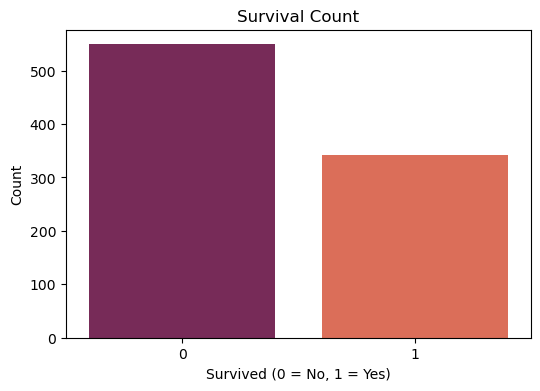

In [230]:
# Survival Rate Visualization
plt.figure(figsize = (6,4))
sns.countplot(x = 'survived', data = df,palette='rocket')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

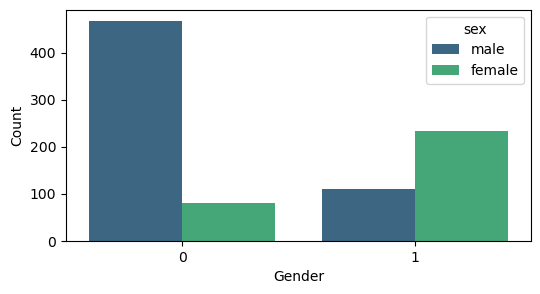

In [236]:
# Survival Rate by Gender
plt.figure(figsize = (6,3))
sns.countplot(x = 'survived', hue = 'sex', data = df,palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

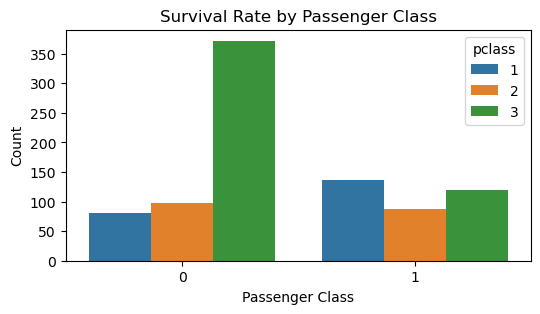

In [165]:
#  Survival Rate by Passenger Class
plt.figure(figsize = (6,3))
sns.countplot(x = 'survived', hue = 'pclass', data = df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

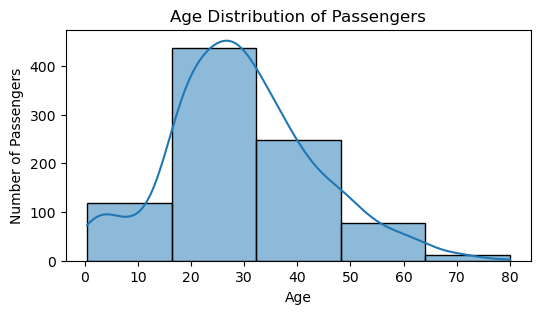

In [240]:
#  Age Distribution of Passengers 
plt.figure(figsize = (6,3))
sns.histplot(x = 'age', bins = 5, kde = True,data = df)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

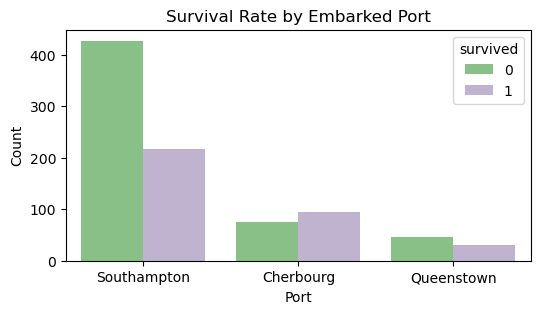

In [242]:
# Survival Rate by Embarked Port
plt.figure(figsize = (6,3))
sns.countplot(x = 'embark_town', hue = 'survived', data = df,palette='Accent')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

In [194]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
age_group      category
dtype: object

In [201]:
numeric = df.select_dtypes(include = ['int64', 'float64'])
numeric

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,22.5,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [208]:
corelation = numeric.corr()
corelation

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.062164,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.304934,0.083081,0.018443,-0.549500
age,-0.062164,-0.304934,1.000000,-0.213410,-0.170013,0.087119
sibsp,-0.035322,0.083081,-0.213410,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.170013,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.087119,0.159651,0.216225,1.000000


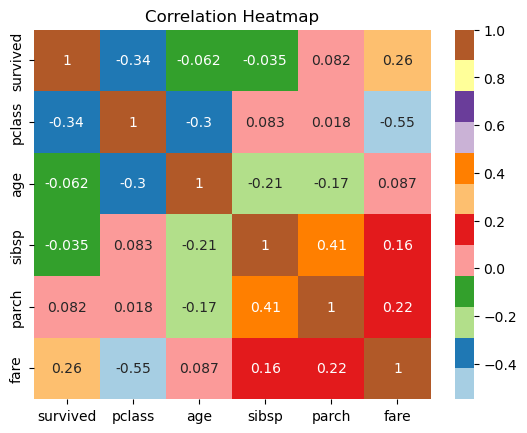

In [244]:
sns.heatmap(corelation, annot=True, cmap='Paired')
plt.title('Correlation Heatmap')
plt.show()

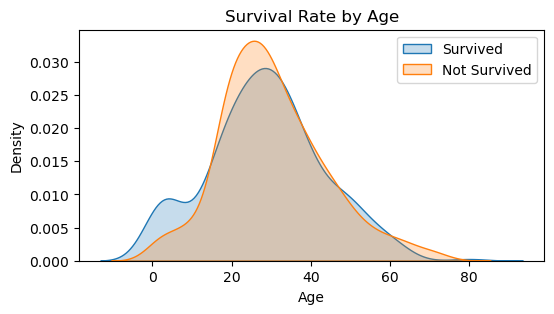

In [224]:
# Survival Rate by Age
plt.figure(figsize = (6,3))
sns.kdeplot(df[df['survived'] == 1]['age'], label='Survived',  fill=True)
sns.kdeplot(df[df['survived'] == 0]['age'], label='Not Survived',  fill=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
